# 从0实现线性回归

In [117]:
%matplotlib inline
import torch
from torch.utils import data
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

In [118]:
#生成数据
def synthetic_data(W,b,num_examples):
    x=torch.normal(0,1,(num_examples,len(W)))
    y=torch.matmul(x,W)+b  #dot用于两个一维张量的点积，而matmul用于两个多维张量的乘法
    y+=torch.normal(0,0.01,y.shape)
    return x,y.reshape(-1,1)
true_W=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_W,true_b,1000)

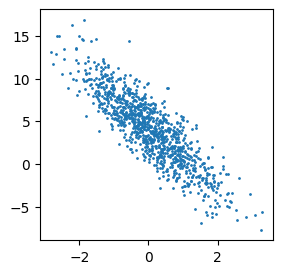

In [119]:
plt.figure(figsize=(3,3))
plt.scatter(features[:,1].numpy(),labels.numpy(),1)
plt.show()

In [120]:
#生成批量大小的数据
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=indices[i:min(i+batch_size,num_examples)]
        yield features[batch_indices],labels[batch_indices]
batch_size=10
next(data_iter(batch_size,features,labels))

(tensor([[-0.2480,  1.3376],
         [ 1.6649,  0.1959],
         [ 1.3802,  1.0582],
         [ 1.9624,  0.0884],
         [-1.5025,  0.5394],
         [-0.3735, -0.8983],
         [ 2.1862,  0.7887],
         [ 2.1092,  1.2612],
         [-1.6764, -0.5572],
         [ 1.6969,  0.5543]]),
 tensor([[-0.8338],
         [ 6.8733],
         [ 3.3595],
         [ 7.8181],
         [-0.6246],
         [ 6.5012],
         [ 5.9028],
         [ 4.1134],
         [ 2.7413],
         [ 5.7103]]))

In [121]:
#定义初始化模型参数
W=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
W,b

(tensor([[ 0.0016],
         [-0.0131]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [122]:
#定义模型
def linear(X,w,b):
    return torch.matmul(X,w)+b

In [123]:
#定义损失函数
def squared_loss(y_hat,y,batch_size):
    "均方损失"
    return (y_hat-y)**2/(2*batch_size)

In [124]:
#定义优化算法
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad
            param.grad.zero_()

In [125]:
#训练过程
lr=0.03
epochs=5
net=linear
loss=squared_loss
for epoch in range(epochs):
    for X,y in data_iter(batch_size,features,labels):
        y_hat=net(X,W,b)
        l=loss(y_hat,y,batch_size).sum()
        l.backward()
        sgd([W,b],lr,batch_size)
    with torch.no_grad():
        train_loss=loss(net(features,W,b),labels,1000).sum()
        print("epoch %d,loss %.6f"%(epoch+1,train_loss.item()))

epoch 1,loss 0.039772
epoch 2,loss 0.000143
epoch 3,loss 0.000051
epoch 4,loss 0.000050
epoch 5,loss 0.000050


In [126]:
print("w的估计误差：",true_W-W.reshape(true_W.shape))
print("b的估计误差：",true_b-b)

w的估计误差： tensor([ 0.0001, -0.0004], grad_fn=<SubBackward0>)
b的估计误差： tensor([-1.7643e-05], grad_fn=<RsubBackward1>)


# 线性回归的简洁实现

In [127]:
true_W=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_W,true_b,1000)
print(batch_size)

10


In [128]:
#构造一个Pytorch数据迭代器
def load_array(batch_size,*dataset):
    dataset=data.TensorDataset(*dataset)
    return data.DataLoader(dataset,batch_size,shuffle=True)
dataloader=load_array(batch_size,features,labels)

In [129]:
#构造模型
net=nn.Linear(2,1)
net.weight.data.normal_(0,0.1)
net.bias.data.fill_(0)

tensor([0.])

In [130]:
#损失函数和优化器
loss=nn.MSELoss()
optim=torch.optim.SGD(net.parameters(),lr=0.03)

In [131]:
epochs=5
for epoch in range(epochs):
    for X,y in dataloader:
        optim.zero_grad()
        l=loss(net(X),y)
        l.backward()
        optim.step()
    l=loss(net(features),labels)
    print("epoch %d,loss %.6f"%(epoch+1,l.item()))

epoch 1,loss 0.000293
epoch 2,loss 0.000099
epoch 3,loss 0.000099
epoch 4,loss 0.000099
epoch 5,loss 0.000099


In [132]:
print("w的估计误差：",true_W-W.reshape(true_W.shape))
print("b的估计误差：",true_b-b)

w的估计误差： tensor([ 0.0001, -0.0004], grad_fn=<SubBackward0>)
b的估计误差： tensor([-1.7643e-05], grad_fn=<RsubBackward1>)
